In [1]:
%matplotlib inline
import os
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
def correlation_study(df, station1, station2, parameter, isplot=1):
    newdf=df[['Station', 'sn', parameter]]
    gradient, intercept, r_value, p_value, std_err = stats.linregress(newdf[newdf['Station']==station1].groupby('sn').mean().reset_index()[parameter], 
                                                                  newdf[newdf['Station']==station2].groupby('sn').mean().reset_index()[parameter])
#     print('Linear regression using stats.linregress')
#     print('regression: a=%.2f b=%.2f, std error= %.3f' % (gradient, intercept, std_err))
    if isplot:
        p = np.poly1d(np.array([gradient, intercept]))
        p(newdf[newdf['Station']==station1].groupby('sn').mean().reset_index()[parameter])
        plt.plot(newdf[newdf['Station']==station1].groupby('sn').mean(), 
                 newdf[newdf['Station']==station2].groupby('sn').mean(), 'o')
        plt.plot(newdf[newdf['Station']==station1].groupby('sn').mean().reset_index()[parameter],
                p(newdf[newdf['Station']==station1].groupby('sn').mean().reset_index()[parameter]))
        plt.title(parameter+'_correlation '+' m='+str(round(gradient,3))+' b='+str(round(intercept,3))+' R^2='+str(round(r_value**2, 3)))
        plt.xlabel(station1)
        plt.ylabel(station2)
        plt.grid()
        plt.savefig(station1+'-'+station2+'_'+df.Phase.unique()[0]+'_'+parameter+'.png', dpi=240)
        plt.close()
    return [df.Phase.unique()[0], round(gradient, 3), round(intercept, 3), round(r_value**2, 3), round(std_err, 3)]

In [26]:
def calculation(df, station1, station2):
    outdf=pd.DataFrame()
    for parameter in df.columns[4:]:
        result = correlation_study(df, station1, station2, parameter, isplot=1)
#         print [station1, station2,  result[0], parameter, result[1], result[2], result[3], result[4]]
        testdf = pd.DataFrame({'Station1':[station1], 'Station2':[station2], 'Phase':[result[0]], 
                             'Parameter':[parameter], 'Slope':[result[1]], 'Intercept':[result[2]], 
                             'R_square':[result[3]], 'MSE':[result[4]]})
        outdf = outdf.append(testdf, ignore_index = True)

        columnsTitles = ['Station1', 'Station2', 'Phase', 'Parameter', 'Slope', 'Intercept', 'R_square', 'MSE']
    outdf = outdf.reindex(columns=columnsTitles)
    outdf = outdf.sort_values(by=['Parameter'])
    outdf.to_csv(station1+'-'+station2+'_'+result[0]+'_correlation.csv', index=False)

In [3]:
# read dataframe
df1 = pd.read_csv(r'/home/fan/Downloads/G501_COMBO3_N1/G501_COMBO3_N1_phase_12_out.csv')
df2 = pd.read_csv(r'/home/fan/Downloads/G501_COMBO3_N2/G501_COMBO3_N2_phase_12_out.csv')
df3 = pd.read_csv(r'/home/fan/Downloads/G501_COMBO3_N3/G501_COMBO3_N3_phase_12_out.csv')
df4 = pd.read_csv(r'/home/fan/Downloads/G502_COMBO3_N1/G502_COMBO3_N1_phase_12_out.csv')
df5 = pd.read_csv(r'/home/fan/Downloads/G502_COMBO3_N2/G502_COMBO3_N2_phase_12_out.csv')
df6 = pd.read_csv(r'/home/fan/Downloads/G502_COMBO3_N3/G502_COMBO3_N3_phase_12_out.csv')
# df7 = pd.read_csv(os.path.join(folder, files[6])
# df8 = pd.read_csv(os.path.join(folder, files[7]))

# reformat dataframe to drop index
df = pd.concat([df1, df2, df3, df4, df5, df6]).reset_index()
df = df[df.columns[1:]]

# stations = [name.split('.')[0] for name in files]
stations =['Combo3_G501_N1', 'Combo3_G501_N2', 'Combo3_G501_N3', 'Combo3_G502_N1', 'Combo3_G502_N2', 'Combo3_G502_N3']

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
df.columns[4:]

In [ ]:
station1 = 'G501_COMBO3_N1'
station2 = 'G501_COMBO3_N2'
parameter = 'SFR_Center_V'
correlation_study(df, station1, station2, parameter)

In [15]:
station1 = 'G501_COMBO3_N1'
station2 = 'G502_COMBO3_N1'

outdf=pd.DataFrame()
for parameter in df.columns[4:]:
    result = correlation_study(df, station1, station2, parameter, isplot=1)
    print [station1, station2,  result[0], parameter, result[1], result[2], result[3], result[4]]
    testdf = pd.DataFrame({'Station1':[station1], 'Station2':[station2], 'Phase':[result[0]], 
                         'Parameter':[parameter], 'Slope':[result[1]], 'Intercept':[result[2]], 
                         'R_square':[result[3]], 'MSE':[result[4]]})
    outdf = outdf.append(testdf, ignore_index = True)

    columnsTitles = ['Station1', 'Station2', 'Phase', 'Parameter', 'Slope', 'Intercept', 'R_square', 'MSE']
outdf = outdf.reindex(columns=columnsTitles)
outdf = outdf.sort_values(by=['Parameter'])
outdf.to_csv(station1+'-'+station2+'_'+result[0]+'_correlation.csv', index=False)

['G501_COMBO3_N1', 'G502_COMBO3_N1', 'RearSfrTestInfCollect', 'SFR_60IH_TL_V', 0.972, 0.023, 0.932, 0.093]
['G501_COMBO3_N1', 'G502_COMBO3_N1', 'RearSfrTestInfCollect', 'SFR_60IH_TR_H', 0.919, 0.048, 0.912, 0.101]
['G501_COMBO3_N1', 'G502_COMBO3_N1', 'RearSfrTestInfCollect', 'SFR_30IH_TL_H', 1.116, -0.076, 0.9, 0.132]
['G501_COMBO3_N1', 'G502_COMBO3_N1', 'RearSfrTestInfCollect', 'SFR_30IH_TL_V', 1.23, -0.123, 0.866, 0.171]
['G501_COMBO3_N1', 'G502_COMBO3_N1', 'RearSfrTestInfCollect', 'SFR_60IH_TR_V', 1.002, -0.003, 0.886, 0.127]
['G501_COMBO3_N1', 'G502_COMBO3_N1', 'RearSfrTestInfCollect', 'SFR_60IH_TL_H', 0.981, -0.01, 0.955, 0.075]
['G501_COMBO3_N1', 'G502_COMBO3_N1', 'RearSfrTestInfCollect', 'SFR_60IH_BR_V', 0.941, 0.083, 0.953, 0.074]
['G501_COMBO3_N1', 'G502_COMBO3_N1', 'RearSfrTestInfCollect', 'lower_horiz_theta', -0.917, 0.263, 0.452, 0.357]
['G501_COMBO3_N1', 'G502_COMBO3_N1', 'RearSfrTestInfCollect', 'SFR_30IH_BL_H', 1.001, -0.012, 0.867, 0.139]
['G501_COMBO3_N1', 'G502_COMBO3

In [ ]:
station1 = 'G501_COMBO3_N1'
station2 = 'G502_COMBO3_N2'
parameter = 'SFR_80IH_BL_V'
newdf=df[['Station', 'sn', parameter]]
gradient, intercept, r_value, p_value, std_err = stats.linregress(newdf[newdf['Station']==station1].groupby('sn').mean().reset_index()[parameter], 
                                                                  newdf[newdf['Station']==station2].groupby('sn').mean().reset_index()[parameter])
print('Linear regression using stats.linregress')
print('regression: a=%.2f b=%.2f, std error= %.3f' % (gradient, intercept, std_err))
p = np.poly1d(np.array([gradient, intercept]))
x = newdf[newdf['Station']==station1].groupby('sn').mean().reset_index()[parameter]
y = newdf[newdf['Station']==station2].groupby('sn').mean().reset_index()[parameter]
yhat = p(x)                         # or [p(z) for z in x]
ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = np.sum((y - ybar)**2)
ssreg / sstot

In [98]:
# read dataframe
df1 = pd.read_csv(r'/home/fan/Downloads/G501_COMBO_N1/G501_COMBO_N1_phase_09_out.csv')
df2 = pd.read_csv(r'/home/fan/Downloads/G501_COMBO_N2/G501_COMBO_N2_phase_09_out.csv')
df3 = pd.read_csv(r'/home/fan/Downloads/G501_COMBO_N3/G501_COMBO_N3_phase_09_out.csv')
df4 = pd.read_csv(r'/home/fan/Downloads/G502_COMBO_N1/G502_COMBO_N1_phase_09_out.csv')
df5 = pd.read_csv(r'/home/fan/Downloads/G502_COMBO_N2/G502_COMBO_N2_phase_09_out.csv')
df6 = pd.read_csv(r'/home/fan/Downloads/G502_COMBO_N3/G502_COMBO_N3_phase_09_out.csv')

# reformat dataframe to drop index
df = pd.concat([df1, df2, df3, df4, df5, df6]).reset_index()
df = df[df.columns[1:]]
camera = 'COMBO'
fullname=[]
for line in ['G501', 'G502']:
    for station in ['N1', 'N2', 'N3']:
        fullname.append(line+'_'+camera+'_'+station)
        
for idx in range(len(fullname)):
    for idy in range(len(fullname)):
        if idx < idy:
            print fullname[idx], fullname[idy]
            calculation(df, fullname[idx], fullname[idy])

G501_COMBO_N1 G501_COMBO_N2
G501_COMBO_N1 G501_COMBO_N3
G501_COMBO_N1 G502_COMBO_N1
G501_COMBO_N1 G502_COMBO_N2
G501_COMBO_N1 G502_COMBO_N3
G501_COMBO_N2 G501_COMBO_N3
G501_COMBO_N2 G502_COMBO_N1
G501_COMBO_N2 G502_COMBO_N2
G501_COMBO_N2 G502_COMBO_N3
G501_COMBO_N3 G502_COMBO_N1
G501_COMBO_N3 G502_COMBO_N2
G501_COMBO_N3 G502_COMBO_N3
G502_COMBO_N1 G502_COMBO_N2
G502_COMBO_N1 G502_COMBO_N3
G502_COMBO_N2 G502_COMBO_N3


(array([ 19.,   4.,   3.,   7.,   5.,   8.,  17.,  16.,  61., 370.]),
 array([0.001 , 0.1008, 0.2006, 0.3004, 0.4002, 0.5   , 0.5998, 0.6996,
        0.7994, 0.8992, 0.999 ]),
 <a list of 10 Patch objects>)

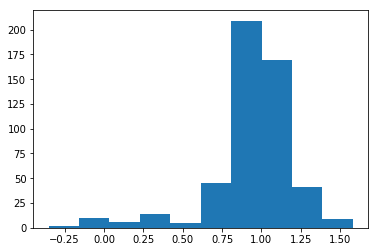

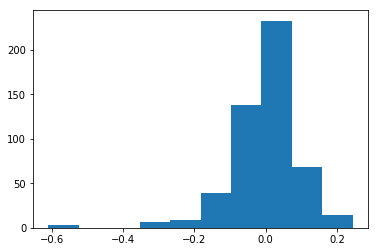

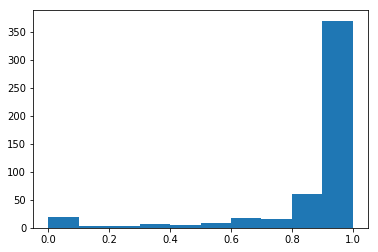

In [80]:
phase = 'RearSfrTestMacroCollect'
result = pd.DataFrame()
df = pd.concat([df1, df2, df3, df4, df5, df6]).reset_index()
df = df[df.columns[1:]]
for idx in range(len(fullname)):
    for idy in range(len(fullname)):
        if idx < idy:
#             print fullname[idx]+'-'+fullname[idy]+'_'+phase+'_correlation.csv'
            temp=pd.read_csv(fullname[idx]+'-'+fullname[idy]+'_'+phase+'_correlation.csv')
            result = result.append(temp, ignore_index = True)
result[(result.R_square < 0.4) & (result.Slope < .5)].sort_values(by='Parameter')
# result.sort_values(by='Parameter')
plt.hist(result.Slope)
plt.figure()
plt.hist(result.Intercept)
plt.figure()
plt.hist(result.R_square)

(array([ 12.,  13.,  10.,  12.,  13.,  24.,  53., 121., 148., 104.]),
 array([0.001 , 0.1009, 0.2008, 0.3007, 0.4006, 0.5005, 0.6004, 0.7003,
        0.8002, 0.9001, 1.    ]),
 <a list of 10 Patch objects>)

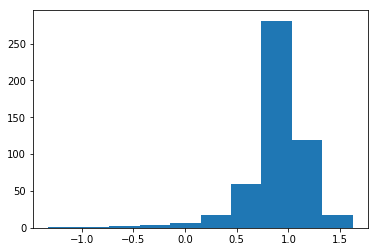

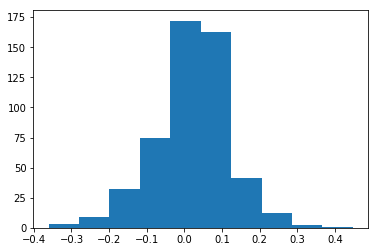

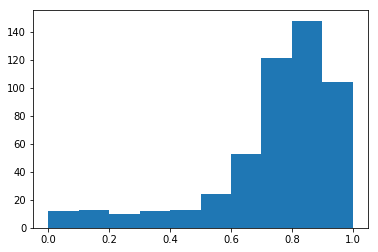

In [79]:
phase = 'RearSfrTestInfCollect'
result = pd.DataFrame()
df = pd.concat([df1, df2, df3, df4, df5, df6]).reset_index()
df = df[df.columns[1:]]
for idx in range(len(fullname)):
    for idy in range(len(fullname)):
        if idx < idy:
#             print fullname[idx]+'-'+fullname[idy]+'_'+phase+'_correlation.csv'
            temp=pd.read_csv(fullname[idx]+'-'+fullname[idy]+'_'+phase+'_correlation.csv')
            result = result.append(temp, ignore_index = True)
result[(result.R_square < 0.4) & (result.Slope < .5)].sort_values(by='Parameter')
plt.hist(result.Slope)
plt.figure()
plt.hist(result.Intercept)
plt.figure()
plt.hist(result.R_square)

In [43]:
result.head()

,Station1,Station2,Phase,Parameter,Slope,Intercept,R_square,MSE
0,G501_COMBO3_N1,G501_COMBO3_N2,FrontSfrUDRCollect,SFR_55lp_30IH_BL_H,0.872,0.065,0.970,0.054
1,G501_COMBO3_N1,G501_COMBO3_N2,FrontSfrUDRCollect,SFR_55lp_30IH_BL_V,0.735,0.127,0.715,0.164
2,G501_COMBO3_N1,G501_COMBO3_N2,FrontSfrUDRCollect,SFR_55lp_30IH_BR_H,0.731,0.129,0.737,0.154
3,G501_COMBO3_N1,G501_COMBO3_N2,FrontSfrUDRCollect,SFR_55lp_30IH_BR_V,0.895,0.051,0.858,0.129
4,G501_COMBO3_N1,G501_COMBO3_N2,FrontSfrUDRCollect,SFR_55lp_30IH_TL_H,0.726,0.132,0.637,0.194


(array([ 6.,  9., 15., 31., 49., 57., 74., 31., 21.,  7.]),
 array([0.221 , 0.3402, 0.4594, 0.5786, 0.6978, 0.817 , 0.9362, 1.0554,
        1.1746, 1.2938, 1.413 ]),
 <a list of 10 Patch objects>)

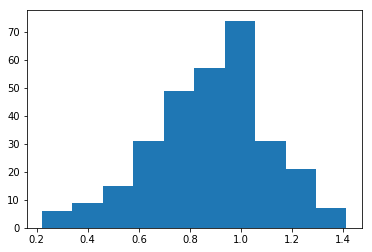

In [42]:
plt.hist(result.Slope)

(array([ 4.,  7., 30., 56., 75., 51., 41., 21., 12.,  3.]),
 array([-0.194 , -0.1441, -0.0942, -0.0443,  0.0056,  0.0555,  0.1054,
         0.1553,  0.2052,  0.2551,  0.305 ]),
 <a list of 10 Patch objects>)

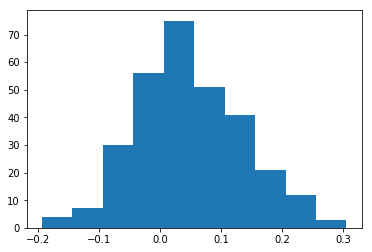

In [44]:
plt.hist(result.Intercept)

(array([10.,  5.,  9., 11., 26., 21., 40., 48., 72., 58.]),
 array([0.066 , 0.1588, 0.2516, 0.3444, 0.4372, 0.53  , 0.6228, 0.7156,
        0.8084, 0.9012, 0.994 ]),
 <a list of 10 Patch objects>)

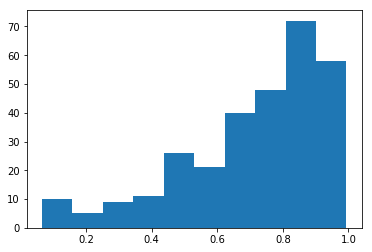

In [45]:
plt.hist(result.R_square)

In [53]:
result[(result.R_square < 0.4) & (result.Slope < .5)].sort_values(by='Parameter')

,Station1,Station2,Phase,Parameter,Slope,Intercept,R_square,MSE
249,G502_COMBO3_N1,G502_COMBO3_N2,FrontSfrUDRCollect,SFR_55lp_60IH_BL_V,0.244,0.234,0.161,0.197
289,G502_COMBO3_N2,G502_COMBO3_N3,FrontSfrUDRCollect,SFR_55lp_60IH_BL_V,0.326,0.229,0.101,0.344
50,G501_COMBO3_N1,G502_COMBO3_N1,FrontSfrUDRCollect,SFR_55lp_60IH_BR_H,0.398,0.226,0.102,0.417
130,G501_COMBO3_N2,G502_COMBO3_N1,FrontSfrUDRCollect,SFR_55lp_60IH_BR_H,0.334,0.253,0.068,0.436
190,G501_COMBO3_N3,G502_COMBO3_N1,FrontSfrUDRCollect,SFR_55lp_60IH_BR_H,0.437,0.213,0.117,0.425
250,G502_COMBO3_N1,G502_COMBO3_N2,FrontSfrUDRCollect,SFR_55lp_60IH_BR_H,0.221,0.279,0.066,0.295
131,G501_COMBO3_N2,G502_COMBO3_N1,FrontSfrUDRCollect,SFR_55lp_60IH_BR_V,0.449,0.191,0.292,0.247
56,G501_COMBO3_N1,G502_COMBO3_N1,FrontSfrUDRCollect,SFR_55lp_Center_H,0.397,0.305,0.258,0.238
196,G501_COMBO3_N3,G502_COMBO3_N1,FrontSfrUDRCollect,SFR_55lp_Center_H,0.464,0.270,0.265,0.273
138,G501_COMBO3_N2,G502_COMBO3_N1,FrontSfrUDRCollect,corner_balance_IH60_H,0.440,0.112,0.116,0.428


In [83]:
df4 = pd.read_csv(r'/home/fan/Downloads/G502_COMBO_N1/G502_COMBO_N1_phase_07_out.csv')

In [84]:
df4

,Station,sn,Operator,Phase,SFR_110lp_60IH_TL_H,SFR_110lp_60IH_BR_V,SFR_110lp_30IH_BL_V,SFR_110lp_60IH_TR_V,SFR_110lp_80IH_BL_H,SFR_110lp_80IH_BL_V,...,SFR_110lp_80IH_BR_V,SFR_110lp_80IH_BR_H,SFR_110lp_Center_H,SFR_110lp_60IH_BL_V,corner_balance_IH80_H,SFR_110lp_80IH_TL_H,SFR_110lp_30IH_BR_V,SFR_110lp_30IH_BR_H,SFR_110lp_80IH_TL_V,corner_balance_IH80_V
0,G502_COMBO_N1,94BBA07578,OP1,FrontSfrTestInfCollect,0.6138,0.6140,0.6917,0.6390,0.5102,0.5714,...,0.5092,0.5030,0.7102,0.6331,0.2065,0.5138,0.6978,0.6833,0.5777,0.1186
1,G502_COMBO_N1,94BBA07578,OP1,FrontSfrTestInfCollect,0.6160,0.6227,0.6853,0.6411,0.5182,0.5941,...,0.5031,0.4996,0.7041,0.6430,0.2129,0.5186,0.6959,0.6809,0.5890,0.1532
2,G502_COMBO_N1,94BBA07578,OP1,FrontSfrTestInfCollect,0.6268,0.6167,0.6909,0.6348,0.5122,0.5861,...,0.4983,0.5041,0.7066,0.6339,0.1946,0.5149,0.7016,0.6791,0.5841,0.1498
3,G502_COMBO_N1,94BBA07578,OP2,FrontSfrTestInfCollect,0.6222,0.6099,0.6909,0.6393,0.5066,0.5715,...,0.5091,0.5106,0.7080,0.6249,0.2119,0.5187,0.7001,0.6850,0.5848,0.1294
4,G502_COMBO_N1,94BBA07578,OP2,FrontSfrTestInfCollect,0.6168,0.6172,0.6821,0.6509,0.5178,0.5786,...,0.5023,0.5076,0.7118,0.6276,0.2204,0.5143,0.6947,0.6829,0.5933,0.1534
5,G502_COMBO_N1,94BBA07578,OP2,FrontSfrTestInfCollect,0.6229,0.6231,0.6858,0.6371,0.5128,0.5807,...,0.5009,0.5094,0.7122,0.6373,0.2051,0.5049,0.7027,0.6821,0.5767,0.1374
6,G502_COMBO_N1,94BBA07578,OP3,FrontSfrTestInfCollect,0.6285,0.6209,0.6875,0.6345,0.5136,0.5863,...,0.4995,0.4998,0.7062,0.6366,0.2064,0.5129,0.6910,0.6826,0.5796,0.1480
7,G502_COMBO_N1,94BBA07578,OP3,FrontSfrTestInfCollect,0.6176,0.6180,0.6926,0.6406,0.5100,0.5950,...,0.5012,0.5001,0.7107,0.6227,0.2261,0.5099,0.7042,0.6835,0.5937,0.1576
8,G502_COMBO_N1,94BBA07578,OP3,FrontSfrTestInfCollect,0.6245,0.6271,0.6859,0.6335,0.5092,0.5890,...,0.4940,0.4943,0.7087,0.6276,0.2268,0.5120,0.6960,0.6849,0.5847,0.1613
9,G502_COMBO_N1,94BBA07607,OP1,FrontSfrTestInfCollect,0.5896,0.5583,0.6815,0.5235,0.4290,0.5250,...,0.4437,0.3702,0.6906,0.5995,0.2178,0.4670,0.7000,0.6610,0.4747,0.1549
